In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

In [2]:
app_train=pd.read_csv('./home_credit_data/app_train.csv')

In [3]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 123 entries, Unnamed: 0 to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(42), object(16)
memory usage: 9.4+ MB


In [249]:
pd.set_option('display.max_rows', 200)
app_train.head().T

,0,1,2,3,4
Unnamed: 0,148432,125153,60085,51714,91980
SK_ID_CURR,272103,245137,169665,159887,206817
TARGET,1,1,1,1,1
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Cash loans,Cash loans,Cash loans
CODE_GENDER,F,F,F,F,M
FLAG_OWN_CAR,N,N,N,N,N
FLAG_OWN_REALTY,N,Y,N,N,Y
CNT_CHILDREN,0,1,2,0,0
AMT_INCOME_TOTAL,180000,135000,112500,157500,202500
AMT_CREDIT,450000,521280,291384,1.08221e+06,545040


In [4]:
app_train_corr=app_train.corr()
app_train_corr

,Unnamed: 0,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
Unnamed: 0,1.000000,0.999999,-0.007906,0.004461,0.006445,0.008967,0.010469,0.009309,0.011605,0.018568,...,-0.004554,-0.010092,-9.978436e-03,1.486843e-02,-0.008364,0.001768,-0.000367,-0.001054,0.000724,-0.005161
SK_ID_CURR,0.999999,1.000000,-0.007898,0.004474,0.006448,0.008978,0.010476,0.009322,0.011596,0.018579,...,-0.004542,-0.010078,-9.965612e-03,1.484002e-02,-0.008363,0.001760,-0.000371,-0.001067,0.000705,-0.005181
TARGET,-0.007906,-0.007898,1.000000,0.024809,-0.049460,-0.067649,-0.025840,-0.084407,-0.069843,0.142876,...,-0.026613,0.004473,-5.252055e-20,2.129126e-16,0.016473,-0.001197,-0.009371,-0.039190,-0.019773,0.035528
CNT_CHILDREN,0.004461,0.004474,0.024809,1.000000,-0.007444,0.000823,0.026589,-0.004196,-0.032749,0.298570,...,-0.016903,-0.001242,-8.539698e-03,1.153489e-03,0.024340,0.007129,-0.012120,-0.013685,0.003334,-0.029827
AMT_INCOME_TOTAL,0.006445,0.006448,-0.049460,-0.007444,1.000000,0.337213,0.442538,0.346232,0.137228,0.035523,...,0.011448,-0.001041,-1.073131e-04,1.275603e-02,0.021137,0.008276,0.004641,0.093500,0.030589,0.034521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.001768,0.001760,-0.001197,0.007129,0.008276,-0.001911,-0.008412,-0.003677,-0.001353,0.004465,...,0.011690,-0.001399,-1.142213e-03,-1.142213e-03,0.245920,1.000000,0.161895,-0.010320,-0.004320,0.028933
AMT_REQ_CREDIT_BUREAU_WEEK,-0.000367,-0.000371,-0.009371,-0.012120,0.004641,0.009636,0.020567,0.009185,0.004209,-0.005555,...,-0.015252,-0.002997,-2.447215e-03,-2.447215e-03,0.019782,0.161895,1.000000,0.002821,0.003737,0.039353
AMT_REQ_CREDIT_BUREAU_MON,-0.001054,-0.001067,-0.039190,-0.013685,0.093500,0.053029,0.035426,0.059281,0.095176,0.000809,...,-0.001692,-0.005372,-4.386114e-03,-4.386114e-03,0.011178,-0.010320,0.002821,1.000000,0.007148,-0.007357
AMT_REQ_CREDIT_BUREAU_QRT,0.000724,0.000705,-0.019773,0.003334,0.030589,0.020997,0.023377,0.023959,-0.001360,-0.018193,...,-0.016560,-0.007417,-6.055806e-03,-6.055806e-03,0.004206,-0.004320,0.003737,0.007148,1.000000,0.103605


In [5]:
abs(app_train_corr.TARGET).sort_values(ascending=False)[:50]

TARGET                         1.000000
EXT_SOURCE_3                   0.312811
EXT_SOURCE_1                   0.311958
EXT_SOURCE_2                   0.262925
DAYS_BIRTH                     0.142876
REGION_RATING_CLIENT_W_CITY    0.117141
REGION_RATING_CLIENT           0.112320
DAYS_LAST_PHONE_CHANGE         0.092998
DAYS_REGISTRATION              0.088131
REG_CITY_NOT_LIVE_CITY         0.087663
FLAG_DOCUMENT_3                0.086024
FLAG_EMP_PHONE                 0.085963
AMT_GOODS_PRICE                0.084407
DAYS_EMPLOYED                  0.083923
DAYS_ID_PUBLISH                0.081256
FLOORSMAX_AVG                  0.076801
FLOORSMAX_MEDI                 0.074953
FLOORSMAX_MODE                 0.074615
REG_CITY_NOT_WORK_CITY         0.074523
REGION_POPULATION_RELATIVE     0.069843
FLOORSMIN_AVG                  0.067685
AMT_CREDIT                     0.067649
FLOORSMIN_MEDI                 0.067091
FLOORSMIN_MODE                 0.060869
BASEMENTAREA_AVG               0.056984


In [6]:
def select_columns(data_frame, column_names):
    new_frame = data_frame.loc[:, column_names]
    return new_frame

In [7]:
selected_columns = ['SK_ID_CURR','TARGET','EXT_SOURCE_3','EXT_SOURCE_1','EXT_SOURCE_2','DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','FLAG_EMP_PHONE','AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_ID_PUBLISH','FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','REG_CITY_NOT_WORK_CITY','REGION_POPULATION_RELATIVE','FLOORSMIN_AVG','AMT_CREDIT','FLOORSMIN_MEDI','FLOORSMIN_MODE','BASEMENTAREA_AVG','BASEMENTAREA_MEDI','LIVINGAREA_AVG','FLAG_DOCUMENT_6','LIVINGAREA_MEDI','ELEVATORS_AVG','OWN_CAR_AGE','TOTALAREA_MODE','ELEVATORS_MEDI','ELEVATORS_MODE','DEF_30_CNT_SOCIAL_CIRCLE','LIVINGAREA_MODE','FLAG_WORK_PHONE','APARTMENTS_AVG','AMT_INCOME_TOTAL','APARTMENTS_MEDI','BASEMENTAREA_MODE','HOUR_APPR_PROCESS_START','ENTRANCES_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','APARTMENTS_MODE','NONLIVINGAREA_MEDI','NONLIVINGAREA_AVG','DEF_60_CNT_SOCIAL_CIRCLE','NONLIVINGAREA_MODE']
train_model = select_columns(app_train, selected_columns)

In [8]:
train_model.dtypes[train_model.dtypes==object].index

Index([], dtype='object')

In [9]:
grouped=train_model.groupby(train_model.TARGET)

target_zero=grouped.get_group(0)
target_zero=pd.DataFrame(target_zero)
target_one=grouped.get_group(1)
target_one=pd.DataFrame(target_one)

In [16]:
from my_functions import missing_value

In [17]:
missing_value(target_zero)

,Sum,Percentage
SK_ID_CURR,0,0.00
TARGET,0,0.00
EXT_SOURCE_3,1004,20.08
EXT_SOURCE_1,2820,56.40
EXT_SOURCE_2,10,0.20
DAYS_BIRTH,0,0.00
REGION_RATING_CLIENT_W_CITY,0,0.00
REGION_RATING_CLIENT,0,0.00
DAYS_LAST_PHONE_CHANGE,0,0.00
DAYS_REGISTRATION,0,0.00


In [18]:
target_zero['EXT_SOURCE_3'].fillna((target_zero['EXT_SOURCE_3'].median()), inplace=True)
target_zero['EXT_SOURCE_1'].fillna((target_zero['EXT_SOURCE_1'].median()), inplace=True)
target_zero['EXT_SOURCE_2'].fillna((target_zero['EXT_SOURCE_2'].median()), inplace=True)
target_zero['AMT_GOODS_PRICE'].fillna((target_zero['AMT_GOODS_PRICE'].median()), inplace=True)
target_zero['FLOORSMAX_AVG'].fillna((target_zero['FLOORSMAX_AVG'].median()), inplace=True)
target_zero['FLOORSMAX_MEDI'].fillna((target_zero['FLOORSMAX_MEDI'].median()), inplace=True)
target_zero['FLOORSMAX_MEDI'].fillna((target_zero['FLOORSMAX_MEDI'].median()), inplace=True)
target_zero['FLOORSMIN_AVG'].fillna((target_zero['FLOORSMIN_AVG'].median()), inplace=True)
target_zero['FLOORSMIN_MEDI'].fillna((target_zero['FLOORSMIN_MEDI'].median()), inplace=True)
target_zero['FLOORSMAX_MODE'].fillna((target_zero['FLOORSMAX_MODE'].median()), inplace=True)
target_zero['FLOORSMIN_MODE'].fillna((target_zero['FLOORSMIN_MODE'].median()), inplace=True)
target_zero['BASEMENTAREA_AVG'].fillna((target_zero['BASEMENTAREA_AVG'].median()), inplace=True)
target_zero['BASEMENTAREA_MEDI'].fillna((target_zero['BASEMENTAREA_MEDI'].median()), inplace=True)
target_zero['LIVINGAREA_AVG'].fillna((target_zero['LIVINGAREA_AVG'].median()), inplace=True)
target_zero['LIVINGAREA_MEDI'].fillna((target_zero['LIVINGAREA_MEDI'].median()), inplace=True)
target_zero['ELEVATORS_AVG'].fillna((target_zero['ELEVATORS_AVG'].median()), inplace=True)
target_zero['OWN_CAR_AGE'].fillna((target_zero['OWN_CAR_AGE'].median()), inplace=True)
target_zero['TOTALAREA_MODE'].fillna((target_zero['TOTALAREA_MODE'].median()), inplace=True)
target_zero['ELEVATORS_MEDI'].fillna((target_zero['ELEVATORS_MEDI'].median()), inplace=True)
target_zero['ELEVATORS_MODE'].fillna((target_zero['ELEVATORS_MODE'].median()), inplace=True)
target_zero['DEF_30_CNT_SOCIAL_CIRCLE'].fillna((target_zero['DEF_30_CNT_SOCIAL_CIRCLE'].median()), inplace=True)
target_zero['LIVINGAREA_MODE'].fillna((target_zero['LIVINGAREA_MODE'].median()), inplace=True)
target_zero['APARTMENTS_AVG'].fillna((target_zero['APARTMENTS_AVG'].median()), inplace=True)
target_zero['APARTMENTS_MEDI'].fillna((target_zero['APARTMENTS_MEDI'].median()), inplace=True)
target_zero['BASEMENTAREA_MODE'].fillna((target_zero['BASEMENTAREA_MODE'].median()), inplace=True)
target_zero['ENTRANCES_MODE'].fillna((target_zero['ENTRANCES_MODE'].median()), inplace=True)
target_zero['ENTRANCES_MEDI'].fillna((target_zero['ENTRANCES_MEDI'].median()), inplace=True)
target_zero['ENTRANCES_AVG'].fillna((target_zero['ENTRANCES_AVG'].median()), inplace=True)
target_zero['APARTMENTS_MODE'].fillna((target_zero['APARTMENTS_MODE'].median()), inplace=True)
target_zero['NONLIVINGAREA_MEDI'].fillna((target_zero['NONLIVINGAREA_MEDI'].median()), inplace=True)
target_zero['NONLIVINGAREA_AVG'].fillna((target_zero['NONLIVINGAREA_AVG'].median()), inplace=True)
target_zero['DEF_60_CNT_SOCIAL_CIRCLE'].fillna((target_zero['DEF_60_CNT_SOCIAL_CIRCLE'].median()), inplace=True)
target_zero['NONLIVINGAREA_MODE'].fillna((target_zero['NONLIVINGAREA_MODE'].median()), inplace=True)

In [19]:
missing_value(target_one)

,Sum,Percentage
SK_ID_CURR,0,0.00
TARGET,0,0.00
EXT_SOURCE_3,1146,22.92
EXT_SOURCE_1,2932,58.64
EXT_SOURCE_2,3,0.06
DAYS_BIRTH,0,0.00
REGION_RATING_CLIENT_W_CITY,0,0.00
REGION_RATING_CLIENT,0,0.00
DAYS_LAST_PHONE_CHANGE,0,0.00
DAYS_REGISTRATION,0,0.00


In [20]:
target_one['EXT_SOURCE_3'].fillna((target_one['EXT_SOURCE_3'].median()), inplace=True)
target_one['EXT_SOURCE_1'].fillna((target_one['EXT_SOURCE_1'].median()), inplace=True)
target_one['EXT_SOURCE_2'].fillna((target_one['EXT_SOURCE_2'].median()), inplace=True)
target_one['AMT_GOODS_PRICE'].fillna((target_one['AMT_GOODS_PRICE'].median()), inplace=True)
target_one['FLOORSMAX_AVG'].fillna((target_one['FLOORSMAX_AVG'].median()), inplace=True)
target_one['FLOORSMAX_MEDI'].fillna((target_one['FLOORSMAX_MEDI'].median()), inplace=True)
target_one['FLOORSMAX_MODE'].fillna((target_one['FLOORSMAX_MODE'].median()), inplace=True)
target_one['FLOORSMIN_AVG'].fillna((target_one['FLOORSMIN_AVG'].median()), inplace=True)
target_one['FLOORSMIN_MEDI'].fillna((target_one['FLOORSMIN_MEDI'].median()), inplace=True)
target_one['FLOORSMIN_MEDI'].fillna((target_one['FLOORSMIN_MEDI'].median()), inplace=True)
target_one['FLOORSMIN_MODE'].fillna((target_one['FLOORSMIN_MODE'].median()), inplace=True)
target_one['BASEMENTAREA_AVG'].fillna((target_one['BASEMENTAREA_AVG'].median()), inplace=True)
target_one['BASEMENTAREA_MEDI'].fillna((target_one['BASEMENTAREA_MEDI'].median()), inplace=True)
target_one['LIVINGAREA_AVG'].fillna((target_one['LIVINGAREA_AVG'].median()), inplace=True)
target_one['LIVINGAREA_MEDI'].fillna((target_one['LIVINGAREA_MEDI'].median()), inplace=True)
target_one['ELEVATORS_AVG'].fillna((target_one['ELEVATORS_AVG'].median()), inplace=True)
target_one['OWN_CAR_AGE'].fillna((target_one['OWN_CAR_AGE'].median()), inplace=True)
target_one['TOTALAREA_MODE'].fillna((target_one['TOTALAREA_MODE'].median()), inplace=True)
target_one['ELEVATORS_MEDI'].fillna((target_one['ELEVATORS_MEDI'].median()), inplace=True)
target_one['ELEVATORS_MODE'].fillna((target_one['ELEVATORS_MODE'].median()), inplace=True)
target_one['DEF_30_CNT_SOCIAL_CIRCLE'].fillna((target_one['DEF_30_CNT_SOCIAL_CIRCLE'].median()), inplace=True)
target_one['LIVINGAREA_MODE'].fillna((target_one['LIVINGAREA_MODE'].median()), inplace=True)
target_one['APARTMENTS_AVG'].fillna((target_one['APARTMENTS_AVG'].median()), inplace=True)
target_one['APARTMENTS_MEDI'].fillna((target_one['APARTMENTS_MEDI'].median()), inplace=True)
target_one['BASEMENTAREA_MODE'].fillna((target_one['BASEMENTAREA_MODE'].median()), inplace=True)
target_one['ENTRANCES_MODE'].fillna((target_one['ENTRANCES_MODE'].median()), inplace=True)
target_one['ENTRANCES_MEDI'].fillna((target_one['ENTRANCES_MEDI'].median()), inplace=True)
target_one['ENTRANCES_AVG'].fillna((target_one['ENTRANCES_AVG'].median()), inplace=True)
target_one['APARTMENTS_MODE'].fillna((target_one['APARTMENTS_MODE'].median()), inplace=True)
target_one['NONLIVINGAREA_MEDI'].fillna((target_one['NONLIVINGAREA_MEDI'].median()), inplace=True)
target_one['NONLIVINGAREA_AVG'].fillna((target_one['NONLIVINGAREA_AVG'].median()), inplace=True)
target_one['DEF_60_CNT_SOCIAL_CIRCLE'].fillna((target_one['DEF_60_CNT_SOCIAL_CIRCLE'].median()), inplace=True)
target_one['NONLIVINGAREA_MODE'].fillna((target_one['NONLIVINGAREA_MODE'].median()), inplace=True)

In [21]:
train_model=pd.concat([target_one,target_zero])

## First Model Logistic Regression

In [22]:
Y=train_model['TARGET']
X=train_model[['EXT_SOURCE_3','EXT_SOURCE_1','EXT_SOURCE_2','DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','FLAG_EMP_PHONE','AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_ID_PUBLISH','FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','REG_CITY_NOT_WORK_CITY','REGION_POPULATION_RELATIVE','FLOORSMIN_AVG','AMT_CREDIT','FLOORSMIN_MEDI','FLOORSMIN_MODE','BASEMENTAREA_AVG','BASEMENTAREA_MEDI','LIVINGAREA_AVG','FLAG_DOCUMENT_6','LIVINGAREA_MEDI','ELEVATORS_AVG','OWN_CAR_AGE','TOTALAREA_MODE','ELEVATORS_MEDI','ELEVATORS_MODE','DEF_30_CNT_SOCIAL_CIRCLE','LIVINGAREA_MODE','FLAG_WORK_PHONE','APARTMENTS_AVG','AMT_INCOME_TOTAL','APARTMENTS_MEDI','BASEMENTAREA_MODE','HOUR_APPR_PROCESS_START','ENTRANCES_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','APARTMENTS_MODE','NONLIVINGAREA_MEDI','NONLIVINGAREA_AVG','DEF_60_CNT_SOCIAL_CIRCLE','NONLIVINGAREA_MODE']]

lrm=linear_model.LogisticRegression()
lrm.fit(X,Y)

LogisticRegression()

In [23]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     120.1
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:04:30   Log-Likelihood:                -4935.1
No. Observations:               10000   AIC:                             9970.
Df Residuals:                    9950   BIC:                         1.033e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.3174      0.823     -2.815      0.005      -3.931      -0.704
EXT_SOURCE_3                   -0.6254      0.022    -27.989      0.000      -0.669      -0.582
EXT_SOURCE_1                   -1.3962      0.029    -48.616      0.000      -1.453      -1.340
EXT_SOURCE_2                   -0.3210      0.021    -15.117      0.000      -0.363      -0.279
DAYS_BIRTH                  -1.598e-05   1.34e-06    -11.932      0.000   -1.86e-05   -1.34e-05
REGION_RATING_CLIENT_W_CITY     0.0685      0.026      2.599      0.009       0.017       0.120
REGION_RATING_CLIENT           -0.0423      0.026     -1.625      0.104      -0.093       0.009
DAYS_LAST_PHONE_CHANGE      -3.197e-06    5.2e-06     -0.615      0.539   -1.34e-05       7e-06
DAYS_REGISTRATION            3.071e-06   1.25e-06      2.456      0.014     6.2e-07    5.52e-06
REG_CITY_NOT_LIVE_CITY          0.0420      0.015      2.812      0.005       0.013       0.071
FLAG_DOCUMENT_3                 0.0450      0.011      4.246      0.000       0.024       0.066
FLAG_EMP_PHONE                  3.5202      0.819      4.296      0.000       1.914       5.126
AMT_GOODS_PRICE             -3.051e-07   6.94e-08     -4.398      0.000   -4.41e-07   -1.69e-07
DAYS_EMPLOYED                9.359e-06   2.22e-06      4.212      0.000       5e-06    1.37e-05
DAYS_ID_PUBLISH              2.524e-07   2.78e-06      0.091      0.928    -5.2e-06     5.7e-06
FLOORSMAX_AVG                   0.4314      0.748      0.577      0.564      -1.035       1.898
FLOORSMAX_MEDI                  0.4403      0.794      0.555      0.579      -1.116       1.997
FLOORSMAX_MODE                 -0.7419      0.318     -2.334      0.020      -1.365      -0.119
REG_CITY_NOT_WORK_CITY         -0.0222      0.011     -2.095      0.036      -0.043      -0.001
REGION_POPULATION_RELATIVE      0.1234      0.371      0.332      0.740      -0.605       0.852
FLOORSMIN_AVG                  -0.2188      0.868     -0.252      0.801      -1.919       1.482
AMT_CREDIT                   2.799e-07   6.29e-08      4.448      0.000    1.57e-07    4.03e-07
FLOORSMIN_MEDI                 -0.8339      0.933     -0.894      0.371      -2.663       0.995
FLOORSMIN_MODE                  1.0605      0.414      2.561      0.010       0.249       1.872
BASEMENTAREA_AVG               12.7323      1.724      7.385      0.000       9.353      16.112
BASEMENTAREA_MEDI             -12.5679      1.696     -7.411      0.000     -15.892      -9.244
LIVINGAREA_AVG                 -3.1192      0.869     -3.589      0.000      -4.823      -1.416
FLAG_DOCUMENT_6                 0.0128      0.021      0.600      0.549      -0.029       0.055
LIVINGAREA_MEDI                 0.1150      0.890      0.129      0.897      -1.629       1.859
ELEVATORS_A

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.20, random_state=111)

In [152]:
first_model = LogisticRegression()
first_model.fit(X_train, y_train)

prediction_train = first_model.predict(X_train)
prediction_test = first_model.predict(X_test)

In [153]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_train, prediction_train)
hata_matrisi_test = confusion_matrix(y_test, prediction_test)

In [154]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[3500  440]
 [3676  384]]
Hata Matrisi (Test verileri)
------------------------------
[[935 125]
 [844  96]]


In [155]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 935
Doğru pozitif sayısı   : 96
Yanlış pozitif sayısı  : 125
Yanlış negatif sayısı  : 844


In [156]:
from sklearn.metrics import recall_score

print("recall_score() değeri        : ",  recall_score(y_test,prediction_test))

recall_score() değeri        :  0.10212765957446808


In [160]:
parameters = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l2']
                }

In [161]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator=first_model,param_grid = parameters,cv = 10)
grid_cv.fit(X, Y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l2']})

In [162]:
print("The best parameter is : ", grid_cv.best_params_)
print("The best score is         : ", grid_cv.best_score_)

The best parameter is :  {'C': 1e-05, 'penalty': 'l2'}
The best score is         :  0.4962


## Second Model

In [24]:
model_logged=train_model.copy()

In [25]:
model_logged['EXT_SOURCE_1']=np.log(model_logged['EXT_SOURCE_1']+1)
model_logged['EXT_SOURCE_2']=np.log(model_logged['EXT_SOURCE_2']+1)
model_logged['DAYS_BIRTH']=np.log(model_logged['DAYS_BIRTH'].abs()+1)
model_logged['DAYS_LAST_PHONE_CHANGE']=np.log(model_logged['DAYS_LAST_PHONE_CHANGE'].abs()+1)
model_logged['DAYS_REGISTRATION']=np.log(model_logged['DAYS_REGISTRATION'].abs()+1)
model_logged['AMT_GOODS_PRICE']=np.log(model_logged['AMT_GOODS_PRICE']+1)
model_logged['DAYS_EMPLOYED']=np.log(model_logged['DAYS_EMPLOYED'].abs()+1)
model_logged['DAYS_ID_PUBLISH']=np.log(model_logged['DAYS_ID_PUBLISH'].abs()+1)
model_logged['FLOORSMAX_AVG']=np.log(model_logged['FLOORSMAX_AVG']+1)
model_logged['FLOORSMAX_MEDI']=np.log(model_logged['FLOORSMAX_MEDI']+1)
model_logged['FLOORSMAX_MODE']=np.log(model_logged['FLOORSMAX_MODE']+1)
model_logged['FLOORSMIN_AVG']=np.log(model_logged['FLOORSMIN_AVG']+1)
model_logged['FLOORSMIN_MEDI']=np.log(model_logged['FLOORSMIN_MEDI']+1)
model_logged['FLOORSMIN_MODE']=np.log(model_logged['FLOORSMIN_MODE']+1)
model_logged['BASEMENTAREA_AVG']=np.log(model_logged['BASEMENTAREA_AVG']+1)
model_logged['BASEMENTAREA_MEDI']=np.log(model_logged['BASEMENTAREA_MEDI']+1)
model_logged['LIVINGAREA_AVG']=np.log(model_logged['LIVINGAREA_AVG']+1)
model_logged['LIVINGAREA_MEDI']=np.log(model_logged['LIVINGAREA_MEDI']+1)
model_logged['ELEVATORS_AVG']=np.log(model_logged['ELEVATORS_AVG']+1)
model_logged['TOTALAREA_MODE']=np.log(model_logged['TOTALAREA_MODE']+1)
model_logged['ELEVATORS_MEDI']=np.log(model_logged['ELEVATORS_MEDI']+1)
model_logged['ELEVATORS_MODE']=np.log(model_logged['ELEVATORS_MODE']+1)
model_logged['LIVINGAREA_MODE']=np.log(model_logged['LIVINGAREA_MODE']+1)
model_logged['APARTMENTS_AVG']=np.log(model_logged['APARTMENTS_AVG']+1)
model_logged['APARTMENTS_MEDI']=np.log(model_logged['APARTMENTS_MEDI']+1)
model_logged['APARTMENTS_MODE']=np.log(model_logged['APARTMENTS_MODE']+1)
model_logged['BASEMENTAREA_MODE']=np.log(model_logged['BASEMENTAREA_MODE']+1)
model_logged['ENTRANCES_AVG']=np.log(model_logged['ENTRANCES_AVG']+1)
model_logged['ENTRANCES_MEDI']=np.log(model_logged['ENTRANCES_MEDI']+1)
model_logged['ENTRANCES_MODE']=np.log(model_logged['ENTRANCES_MODE']+1)

In [26]:
group_one=(train_model['DAYS_BIRTH'].mean()+train_model['DAYS_BIRTH'].min())/2
group_two=(train_model['DAYS_BIRTH'].mean()+train_model['DAYS_BIRTH'].max())/2
mean=train_model['DAYS_BIRTH'].mean()


In [27]:
def categorized_sales(x,group_one,group_two,mean):
    if x<mean:
        if x<group_one:
            return 1
        else:
            return 2
    else:
        if x<group_two:
            return 3
        else:
            return 4

In [28]:
model_logged['DAYS_BIRTH_GROUP']=train_model['DAYS_BIRTH'].apply(lambda x: categorized_sales(x,group_one,group_two,mean))


In [29]:
Y=model_logged['TARGET']
X=model_logged[['EXT_SOURCE_3','EXT_SOURCE_1','EXT_SOURCE_2','DAYS_BIRTH', 'REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT','DAYS_LAST_PHONE_CHANGE','DAYS_REGISTRATION','REG_CITY_NOT_LIVE_CITY','FLAG_DOCUMENT_3','FLAG_EMP_PHONE','AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_ID_PUBLISH','FLOORSMAX_AVG','FLOORSMAX_MEDI','FLOORSMAX_MODE','REG_CITY_NOT_WORK_CITY','REGION_POPULATION_RELATIVE','FLOORSMIN_AVG','AMT_CREDIT','FLOORSMIN_MEDI','FLOORSMIN_MODE','BASEMENTAREA_AVG','BASEMENTAREA_MEDI','LIVINGAREA_AVG','FLAG_DOCUMENT_6','LIVINGAREA_MEDI','ELEVATORS_AVG','OWN_CAR_AGE','TOTALAREA_MODE','ELEVATORS_MEDI','ELEVATORS_MODE','DEF_30_CNT_SOCIAL_CIRCLE','LIVINGAREA_MODE','FLAG_WORK_PHONE','APARTMENTS_AVG','AMT_INCOME_TOTAL','APARTMENTS_MEDI','BASEMENTAREA_MODE','HOUR_APPR_PROCESS_START','ENTRANCES_MODE','ENTRANCES_MEDI','ENTRANCES_AVG','APARTMENTS_MODE','NONLIVINGAREA_MEDI','NONLIVINGAREA_AVG','DEF_60_CNT_SOCIAL_CIRCLE','NONLIVINGAREA_MODE']]

In [30]:
lrm=linear_model.LogisticRegression()
lrm.fit(X,Y)

LogisticRegression()

In [31]:
import statsmodels.api as sm

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TARGET   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     122.2
Date:                Mon, 17 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:04:46   Log-Likelihood:                -4902.1
No. Observations:               10000   AIC:                             9904.
Df Residuals:                    9950   BIC:                         1.026e+04
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.0401      0.248     -4.199      0.000      -1.526      -0.555
EXT_SOURCE_3                   -0.6246      0.022    -28.110      0.000      -0.668      -0.581
EXT_SOURCE_1                   -2.0352      0.041    -49.411      0.000      -2.116      -1.955
EXT_SOURCE_2                   -0.4492      0.029    -15.346      0.000      -0.507      -0.392
DAYS_BIRTH                      0.2432      0.019     13.048      0.000       0.207       0.280
REGION_RATING_CLIENT_W_CITY     0.0704      0.026      2.677      0.007       0.019       0.122
REGION_RATING_CLIENT           -0.0432      0.026     -1.664      0.096      -0.094       0.008
DAYS_LAST_PHONE_CHANGE         -0.0010      0.002     -0.620      0.535      -0.004       0.002
DAYS_REGISTRATION              -0.0068      0.003     -2.039      0.042      -0.013      -0.000
REG_CITY_NOT_LIVE_CITY          0.0449      0.015      3.010      0.003       0.016       0.074
FLAG_DOCUMENT_3                 0.0503      0.010      4.811      0.000       0.030       0.071
FLAG_EMP_PHONE                 -0.0265      0.028     -0.950      0.342      -0.081       0.028
AMT_GOODS_PRICE                 0.0409      0.015      2.808      0.005       0.012       0.069
DAYS_EMPLOYED                  -0.0181      0.004     -4.094      0.000      -0.027      -0.009
DAYS_ID_PUBLISH                -0.0030      0.004     -0.724      0.469      -0.011       0.005
FLOORSMAX_AVG                   0.8572      0.994      0.862      0.389      -1.092       2.806
FLOORSMAX_MEDI                  0.2161      1.055      0.205      0.838      -1.851       2.283
FLOORSMAX_MODE                 -0.8646      0.405     -2.134      0.033      -1.659      -0.070
REG_CITY_NOT_WORK_CITY         -0.0228      0.011     -2.153      0.031      -0.044      -0.002
REGION_POPULATION_RELATIVE      0.1489      0.369      0.403      0.687      -0.575       0.873
FLOORSMIN_AVG                  -0.4918      1.127     -0.436      0.663      -2.702       1.718
AMT_CREDIT                  -6.219e-08   2.67e-08     -2.330      0.020   -1.15e-07   -9.86e-09
FLOORSMIN_MEDI                 -0.7434      1.211     -0.614      0.539      -3.118       1.631
FLOORSMIN_MODE                  1.2607      0.508      2.484      0.013       0.266       2.256
BASEMENTAREA_AVG               14.8575      1.915      7.760      0.000      11.105      18.610
BASEMENTAREA_MEDI             -14.5085      1.869     -7.762      0.000     -18.172     -10.845
LIVINGAREA_AVG                 -5.0909      1.127     -4.515      0.000      -7.301      -2.881
FLAG_DOCUMENT_6                 0.0210      0.021      0.989      0.322      -0.021       0.063
LIVINGAREA_MEDI                 1.3692      1.168      1.172      0.241      -0.920       3.659
ELEVATORS_A

## Winsorize

In [58]:
import seaborn as sns
def outlier_inspect(df, col, min_z=1, max_z = 5, step = 0.5, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(20, 6))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z=min_z, max_z = max_z, step = step)
    plt.show()

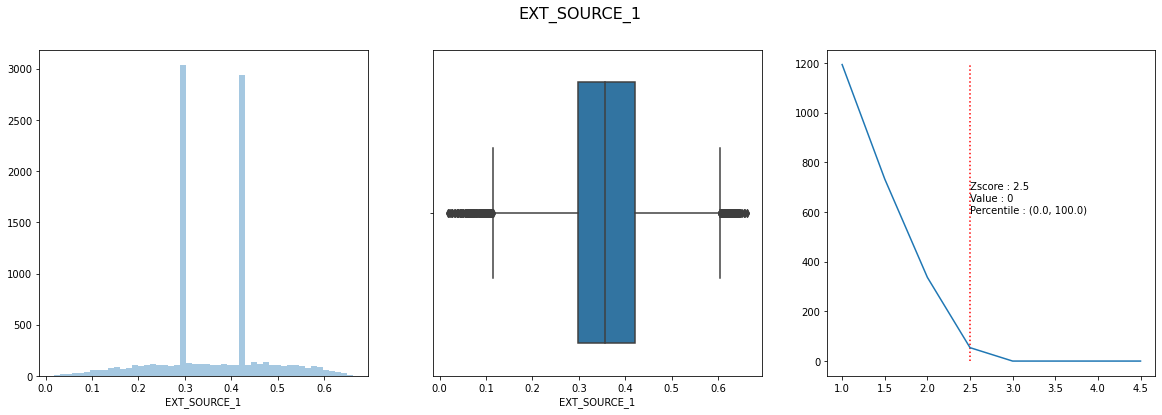

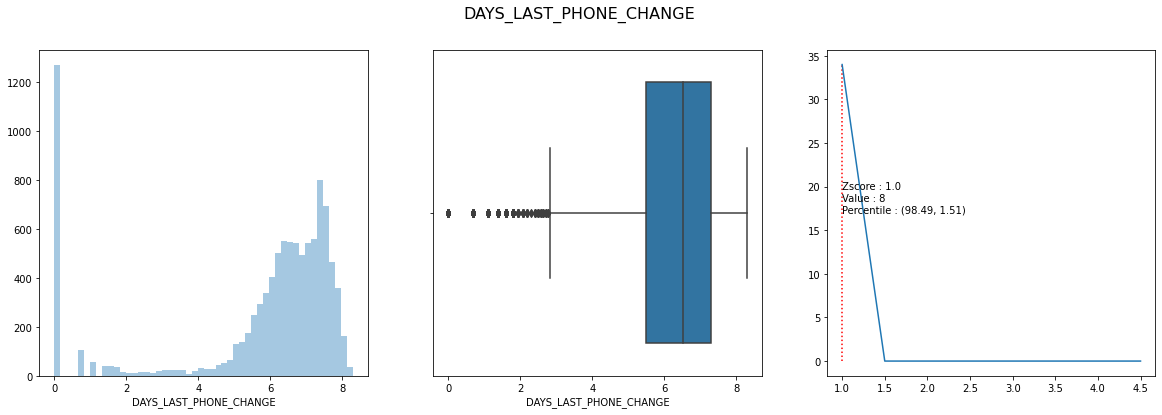

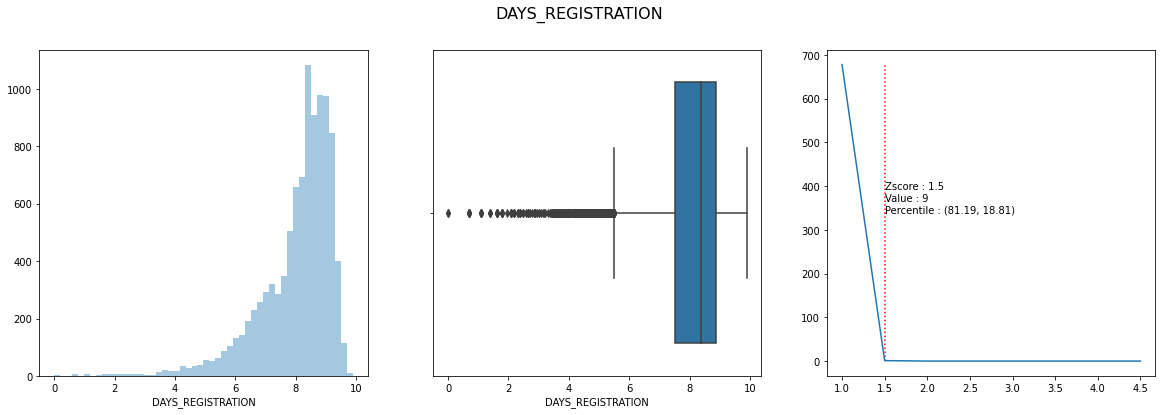

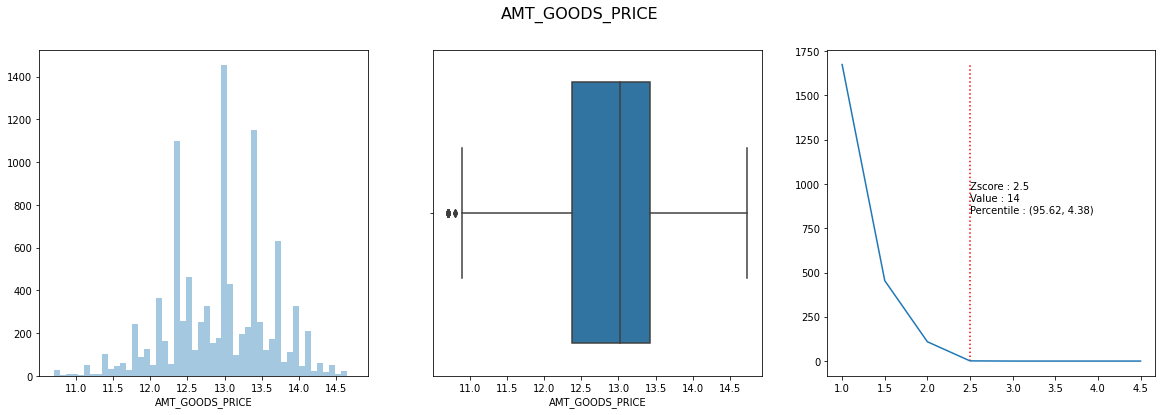

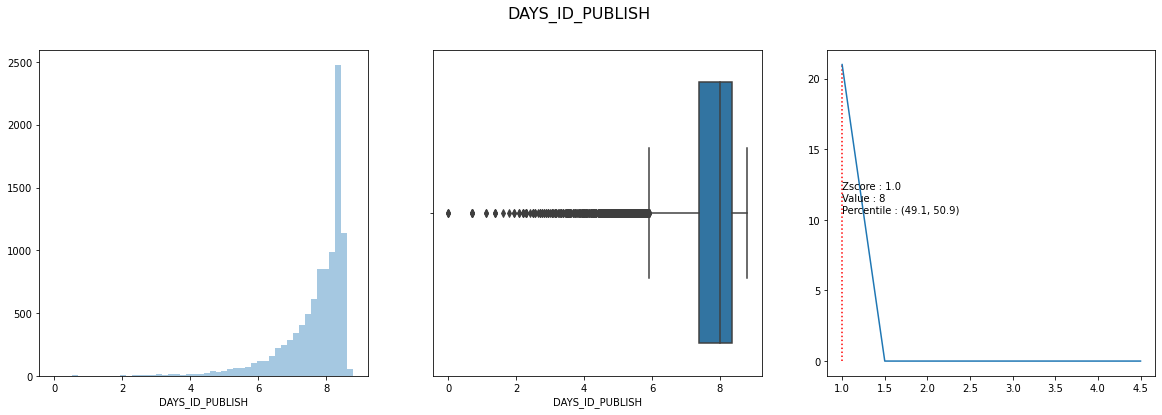

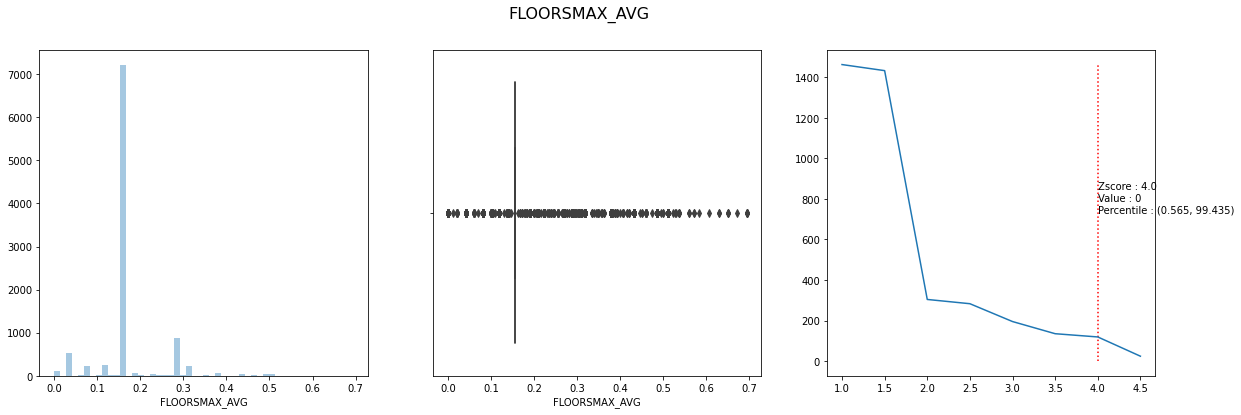

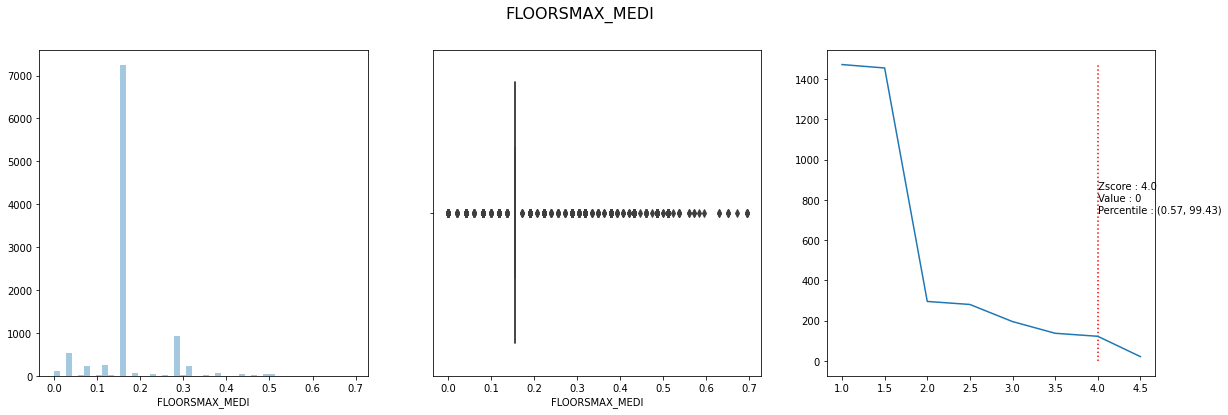

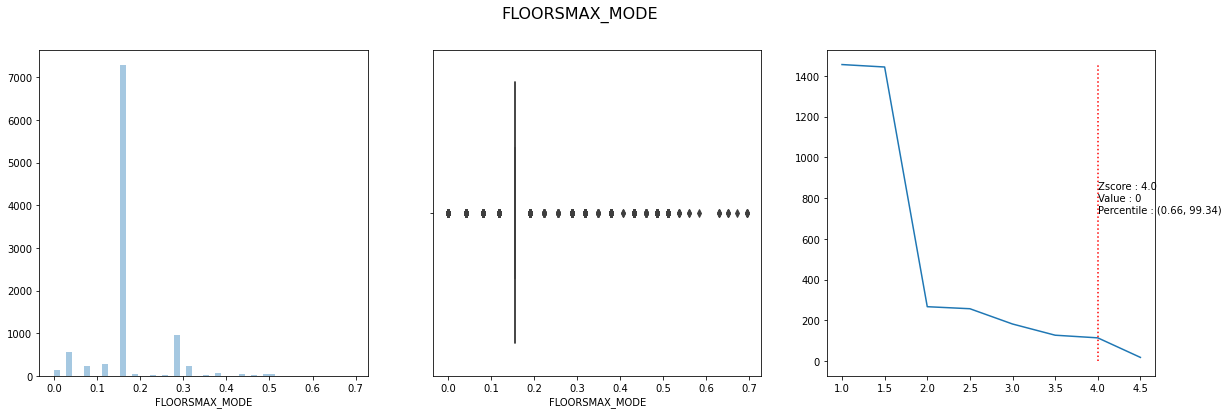

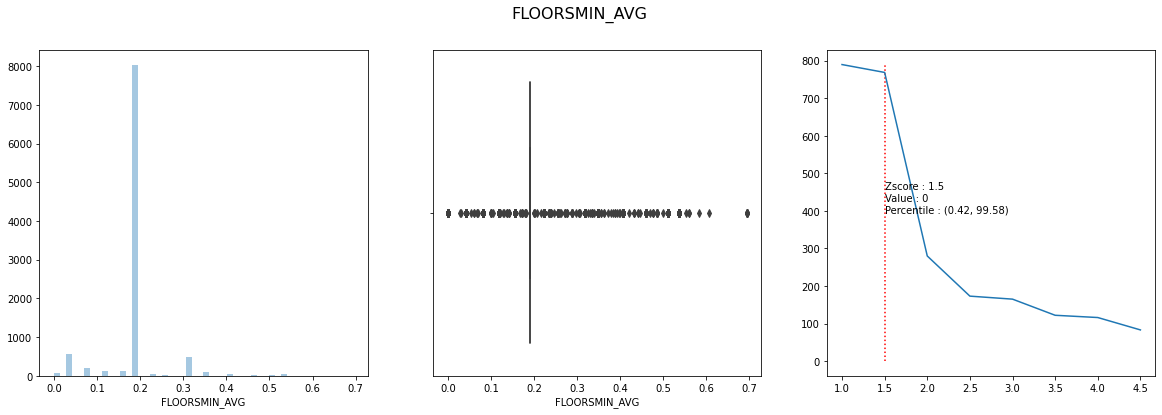

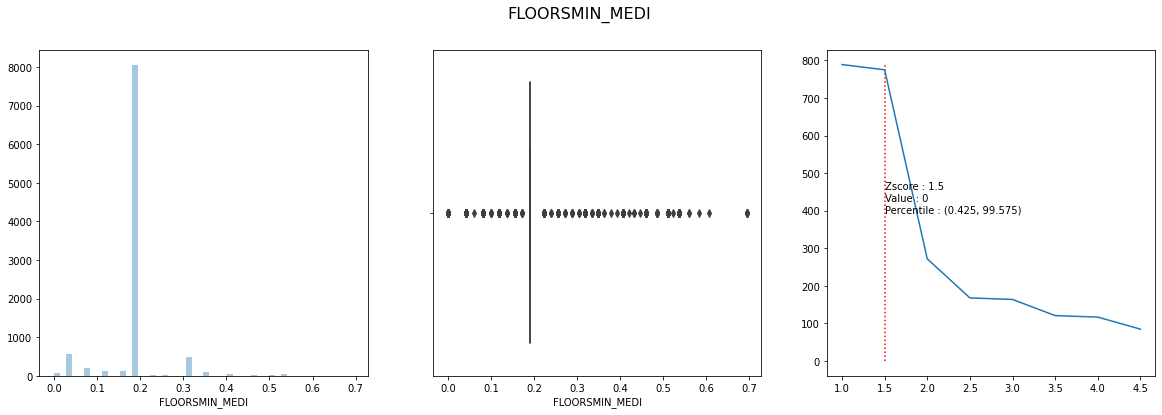

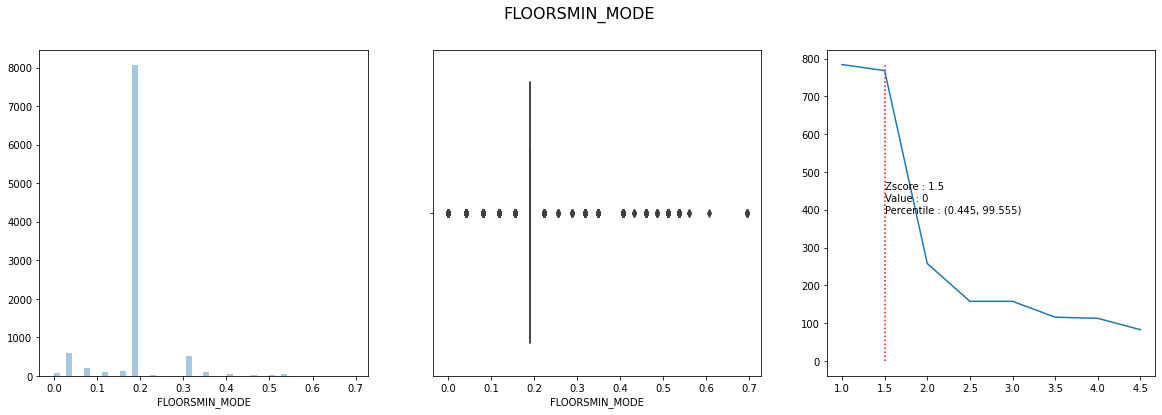

In [62]:
outlier_inspect(model_logged,'EXT_SOURCE_1')
outlier_inspect(model_logged,'DAYS_LAST_PHONE_CHANGE')
outlier_inspect(model_logged,'DAYS_REGISTRATION')
outlier_inspect(model_logged,'AMT_GOODS_PRICE')
outlier_inspect(model_logged,'DAYS_ID_PUBLISH')
outlier_inspect(model_logged,'FLOORSMAX_AVG')
outlier_inspect(model_logged,'FLOORSMAX_MEDI')
outlier_inspect(model_logged,'FLOORSMAX_MODE')
outlier_inspect(model_logged,'FLOORSMIN_AVG')
outlier_inspect(model_logged,'FLOORSMIN_MEDI')
outlier_inspect(model_logged,'FLOORSMIN_MODE')

## Feature Engineering

### From Bureau

In [100]:
bureau = pd.read_csv('./home_credit_data/bureau_test.csv')
bureau.head()

,Unnamed: 0,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,33,400486,5714504,Closed,currency 1,-2413,0,-1864.0,-2128.0,NaN,0,180000.0,0.0,0.0,0.0,Consumer credit,-708,NaN
1,34,400486,5714506,Active,currency 1,-941,0,-17.0,NaN,NaN,0,40500.0,0.0,0.0,0.0,Credit card,-15,NaN
2,35,400486,5714507,Closed,currency 1,-1110,0,-745.0,-727.0,NaN,0,114727.5,0.0,0.0,0.0,Consumer credit,-658,NaN
3,36,400486,5714508,Closed,currency 1,-2133,0,-1038.0,-1127.0,NaN,0,225000.0,0.0,0.0,0.0,Consumer credit,-708,NaN
4,37,400486,5714509,Active,currency 1,-391,0,705.0,NaN,NaN,0,142290.0,108315.0,0.0,0.0,Consumer credit,-30,NaN


In [101]:
PREVIOUS_LOAN_COUNTS = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'PREVIOUS_LOAN_COUNTS'})
PREVIOUS_LOAN_COUNTS.head()

,SK_ID_CURR,PREVIOUS_LOAN_COUNTS
0,100004,2
1,100054,2
2,100055,7
3,100077,4
4,100181,10


In [102]:
model_df = model_logged.merge(PREVIOUS_LOAN_COUNTS, on = 'SK_ID_CURR', how = 'left')
model_df.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,...,ENTRANCES_MODE,ENTRANCES_MEDI,ENTRANCES_AVG,APARTMENTS_MODE,NONLIVINGAREA_MEDI,NONLIVINGAREA_AVG,DEF_60_CNT_SOCIAL_CIRCLE,NONLIVINGAREA_MODE,DAYS_BIRTH_GROUP,PREVIOUS_LOAN_COUNTS
0,272103,1,0.209155,0.383783,0.498982,9.325899,2,2,7.750184,9.323758,...,0.129184,0.129184,0.129184,0.072879,0.0012,0.00175,0.0,0.0000,4,9.0
1,245137,1,0.420611,0.176568,0.184767,9.226902,2,2,5.659482,8.420242,...,0.129184,0.129184,0.129184,0.072879,0.0012,0.00175,1.0,0.0000,4,3.0
2,169665,1,0.192942,0.298317,0.396168,9.846970,2,2,5.993961,9.166911,...,0.129184,0.129184,0.129184,0.072879,0.0012,0.00175,0.0,0.0000,2,1.0
3,159887,1,0.646330,0.298317,0.437300,9.545526,2,2,2.079442,9.132811,...,0.129184,0.129184,0.129184,0.139936,0.0013,0.00120,0.0,0.0013,3,15.0
4,206817,1,0.466864,0.298317,0.151982,9.815093,2,2,7.296413,7.817223,...,0.129184,0.129184,0.129184,0.072879,0.0012,0.00175,0.0,0.0000,2,15.0


In [103]:
model_df['PREVIOUS_LOAN_COUNTS'] = model_df['PREVIOUS_LOAN_COUNTS'].fillna(0)
model_df.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,...,ENTRANCES_MODE,ENTRANCES_MEDI,ENTRANCES_AVG,APARTMENTS_MODE,NONLIVINGAREA_MEDI,NONLIVINGAREA_AVG,DEF_60_CNT_SOCIAL_CIRCLE,NONLIVINGAREA_MODE,DAYS_BIRTH_GROUP,PREVIOUS_LOAN_COUNTS
0,272103,1,0.209155,0.383783,0.498982,9.325899,2,2,7.750184,9.323758,...,0.129184,0.129184,0.129184,0.072879,0.0012,0.00175,0.0,0.0000,4,9.0
1,245137,1,0.420611,0.176568,0.184767,9.226902,2,2,5.659482,8.420242,...,0.129184,0.129184,0.129184,0.072879,0.0012,0.00175,1.0,0.0000,4,3.0
2,169665,1,0.192942,0.298317,0.396168,9.846970,2,2,5.993961,9.166911,...,0.129184,0.129184,0.129184,0.072879,0.0012,0.00175,0.0,0.0000,2,1.0
3,159887,1,0.646330,0.298317,0.437300,9.545526,2,2,2.079442,9.132811,...,0.129184,0.129184,0.129184,0.139936,0.0013,0.00120,0.0,0.0013,3,15.0
4,206817,1,0.466864,0.298317,0.151982,9.815093,2,2,7.296413,7.817223,...,0.129184,0.129184,0.129184,0.072879,0.0012,0.00175,0.0,0.0000,2,15.0


In [104]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [105]:
bureau_agg_new = agg_numeric(df=bureau.drop(columns = ['SK_ID_BUREAU','CREDIT_ACTIVE','CREDIT_CURRENCY']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new.head()

<ipython-input-104-6f54f58777b4>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[group_var] = group_ids


,SK_ID_CURR,bureau_Unnamed: 0_count,bureau_Unnamed: 0_mean,bureau_Unnamed: 0_sum,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_sum,...,bureau_AMT_CREDIT_SUM_LIMIT_sum,bureau_AMT_CREDIT_SUM_OVERDUE_count,bureau_AMT_CREDIT_SUM_OVERDUE_mean,bureau_AMT_CREDIT_SUM_OVERDUE_sum,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_sum
0,100004,2,363104.50,726209,2,-867.000000,-1734,2,0.0,0,...,0.00,2,0.0,0.0,2,-532.00,-1064,0,NaN,0.0
1,100054,2,83465.50,166931,2,-1310.500000,-2621,2,0.0,0,...,0.00,2,0.0,0.0,2,-578.00,-1156,0,NaN,0.0
2,100055,7,854069.00,5978483,7,-876.857143,-6138,7,0.0,0,...,0.00,7,0.0,0.0,7,-288.00,-2016,0,NaN,0.0
3,100077,4,633170.75,2532683,4,-824.250000,-3297,4,0.0,0,...,12073.05,4,0.0,0.0,4,-537.75,-2151,0,NaN,0.0
4,100181,10,916160.50,9161605,10,-1041.300000,-10413,10,0.0,0,...,0.00,10,0.0,0.0,10,-676.00,-6760,7,9414.642857,65902.5


In [106]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

,CREDIT_ACTIVE_Active,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 1,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_TYPE_Another type of loan,CREDIT_TYPE_Car loan,CREDIT_TYPE_Consumer credit,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Unknown type of loan,SK_ID_CURR
0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,400486
1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,400486
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,400486
3,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,400486
4,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,400486


In [107]:
grp = bureau[['SK_ID_CURR', 'CREDIT_TYPE']].groupby(by = ['SK_ID_CURR'])['CREDIT_TYPE'].nunique().reset_index().rename(index=str, columns={'CREDIT_TYPE': 'BUREAU_LOAN_TYPES'})
bureau = bureau.merge(grp, on = ['SK_ID_CURR'], how = 'left')
bureau.head()

,Unnamed: 0,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,BUREAU_LOAN_TYPES
0,33,400486,5714504,Closed,currency 1,-2413,0,-1864.0,-2128.0,NaN,0,180000.0,0.0,0.0,0.0,Consumer credit,-708,NaN,2
1,34,400486,5714506,Active,currency 1,-941,0,-17.0,NaN,NaN,0,40500.0,0.0,0.0,0.0,Credit card,-15,NaN,2
2,35,400486,5714507,Closed,currency 1,-1110,0,-745.0,-727.0,NaN,0,114727.5,0.0,0.0,0.0,Consumer credit,-658,NaN,2
3,36,400486,5714508,Closed,currency 1,-2133,0,-1038.0,-1127.0,NaN,0,225000.0,0.0,0.0,0.0,Consumer credit,-708,NaN,2
4,37,400486,5714509,Active,currency 1,-391,0,705.0,NaN,NaN,0,142290.0,108315.0,0.0,0.0,Consumer credit,-30,NaN,2


In [108]:
model_df = model_df.merge(grp, on = 'SK_ID_CURR', how = 'left')
model_df.head()

,SK_ID_CURR,TARGET,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,...,ENTRANCES_MEDI,ENTRANCES_AVG,APARTMENTS_MODE,NONLIVINGAREA_MEDI,NONLIVINGAREA_AVG,DEF_60_CNT_SOCIAL_CIRCLE,NONLIVINGAREA_MODE,DAYS_BIRTH_GROUP,PREVIOUS_LOAN_COUNTS,BUREAU_LOAN_TYPES
0,272103,1,0.209155,0.383783,0.498982,9.325899,2,2,7.750184,9.323758,...,0.129184,0.129184,0.072879,0.0012,0.00175,0.0,0.0000,4,9.0,2.0
1,245137,1,0.420611,0.176568,0.184767,9.226902,2,2,5.659482,8.420242,...,0.129184,0.129184,0.072879,0.0012,0.00175,1.0,0.0000,4,3.0,2.0
2,169665,1,0.192942,0.298317,0.396168,9.846970,2,2,5.993961,9.166911,...,0.129184,0.129184,0.072879,0.0012,0.00175,0.0,0.0000,2,1.0,1.0
3,159887,1,0.646330,0.298317,0.437300,9.545526,2,2,2.079442,9.132811,...,0.129184,0.129184,0.139936,0.0013,0.00120,0.0,0.0013,3,15.0,2.0
4,206817,1,0.466864,0.298317,0.151982,9.815093,2,2,7.296413,7.817223,...,0.129184,0.129184,0.072879,0.0012,0.00175,0.0,0.0000,2,15.0,2.0


In [110]:
model_df_corr=model_df.corr()
abs(model_df_corr.TARGET).sort_values(ascending=False)[:]

TARGET                         1.000000
EXT_SOURCE_1                   0.509788
EXT_SOURCE_3                   0.366627
EXT_SOURCE_2                   0.261426
DAYS_BIRTH                     0.141339
DAYS_BIRTH_GROUP               0.138141
DAYS_EMPLOYED                  0.132066
OWN_CAR_AGE                    0.119353
REGION_RATING_CLIENT_W_CITY    0.117141
REGION_RATING_CLIENT           0.112320
BASEMENTAREA_MEDI              0.099660
LIVINGAREA_AVG                 0.098726
BASEMENTAREA_AVG               0.096775
LIVINGAREA_MEDI                0.093763
BASEMENTAREA_MODE              0.093742
TOTALAREA_MODE                 0.091171
REG_CITY_NOT_LIVE_CITY         0.087663
FLAG_DOCUMENT_3                0.086024
FLAG_EMP_PHONE                 0.085963
LIVINGAREA_MODE                0.085640
APARTMENTS_AVG                 0.084259
APARTMENTS_MODE                0.081220
APARTMENTS_MEDI                0.079933
REG_CITY_NOT_WORK_CITY         0.074523
REGION_POPULATION_RELATIVE     0.069843


## Pandas Profiling Report

In [12]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train_model, title="Pandas Profiling Report")

In [13]:
profile.to_file("home_credit_profiling.html")